In [98]:
import nltk
#nltk.download()
import numpy as np
import matplotlib.pyplot as plt
import re

from nltk import FreqDist
from unicodedata import normalize
%matplotlib inline

In [103]:
texto = '''
Prezados,
Favor avaliar o tempo de operação da cunsulta.
Realizamos a operação "Receber intimações" junto com o Silvano e tivemos o seguinte resultado.

Obs.: Situação similar encaminhada na salt 240716/45.
                
Coletamos evidências que seguem anexadas.

Servidor: FLNSRVUNJ4109 (172.23.4.109)
Aplicação: SPJ
Cliente: 2807
Chamada: 0182
Data/Hora: 12/04 11:05

=================================================

  WITH OBJS AS ( 
   SELECT 
      W.CDOBJETO,
      W.CDFLUXOTRABALHO,
      W.CDFILA,
     W.TPFILA 
   FROM 
   UNION 
   FROM
....
'''


texto2 = '''
Ambiente: Produção
Servidor APP: local
Versão da aplicação: 4.0.18-83
Nome do usuário: Vlamir Meneguini
Login do usuário: VMENEGUINI
Chefia: PR11 – Procuradoria Regional de Marília
Lotação: Gabinete do procurador Dr Vlamir Meneguini
Data e hora da ocorrência: 19/09/2017 – 15:30 hrs

Descrição da SALT:
Procurador está tentando Classificar as movimentações e o sistema abre uma tela sobreposta logo em cima das manifestações, impossibilitando o procurador de selecionar a desejada.
O problema ocorre quando existem 2 pendências do mesmo processo.
No momento o procurador esta encerrando uma pendência para poder conseguir classificar, depois ele reativa a outra pra classificar e encerra a primeira, depois reativa novamente, isso causa uma grande perda de tempo e o trabalho fica redobrado.
Procurador pediu urgência, pois antes da ultima atualização isso não ocorria

Segue o vídeo e imagem  anexa.

Grato.

Nome e Telefone do Analista: Rodrigo Coneglian 048-99178-4824 / 14 99615-9199


Exemplo de URL:
http://127.0.0.1/
http://127.0.0.1
www.google.com
'''

texto2 = texto + '''
Local informado pelo cliente: Agenda
 
 Anexo após o envio do Portal: 
Erro Agenda Vmeneguini.jpg
 
 
 Anexo após o envio do Portal: 
Agenda Vmeneguini.zip
 
 
 Anexo após o envio do Portal: 
Agenda Vlamir 29_09.avi
 
 
 Anexo após o envio do Portal: 
Agenda Vlamir - versão do sistema.zip
 
 
 Anexo após o envio do Portal: 
PR12 - Tela classificar pendencia.jpg
'''


In [6]:
def minusculo(s):
    return s.lower()

In [7]:
def tokenizar(s):
    toke = nltk.word_tokenize(s)
    toke = nltk.pos_tag(toke)
    return toke
#nltk.help.upenn_tagset('NNP')

In [8]:
def contagem_palavras(s):
    contagem = tokenizar(s)
    contagem = FreqDist(contagem)
    return contagem

In [9]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [10]:
def Pontuacao(s):
    return re.sub(r'[-./?!,":;()\']',' ',s)

In [11]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

In [113]:
def RemoveStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    stopwords.add('w')
    palavras = [i for i in instancia.split() if not i in stopwords]
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = " ".join(palavras)
    palavras = [i for i in palavras.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
def RemoveAcentos(s):
    return normalize('NFKD', s).encode('ASCII', 'ignore').decode('ASCII')

In [14]:
def RemoveURL(s):
    # Código-Fonte utilizado para remoção de hashtags e URLs do corpus
    # Remove as hashtags do corpus pattern = re.compile(r'\#\w+') raw = pattern.sub('', raw)
    # Remove as URLs do corpus
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return pattern.sub('', s)
    

In [114]:
s = texto 
s = Pontuacao(s)
s = minusculo(s)
s = RemoveAcentos(s)
s = RemoveStopWords(s)
s = RemoveURL(s)
s
#print (Stemming(s))
#print (tokenizar())
#contagem_palavras()

'prezados favor avaliar tempo operacao cunsulta realizamos operacao receber intimacoes junto silvano seguinte resultado obs situacao similar encaminhada salt 240716 45 coletamos evidencias seguem anexadas servidor flnsrvunj4109 172 23 4 109 aplicacao spj cliente 2807 chamada 0182 data hora 12 04 11 05 ================================================= objs select cdobjeto cdfluxotrabalho cdfila tpfila union'

In [93]:
#bigrm = list(nltk.bigrams(s.split()))
#print(*map(' '.join, bigrm), sep=', ')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def get_bigrams(myString):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(myString)
    stemmer = PorterStemmer()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 500)

    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        tokens.append(x)

    result = [' '.join([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 8]
    return result

contagem = FreqDist(get_bigrams(s))
contagem

FreqDist({'048 99178': 1,
          '2 pendencia': 1,
          '9199 exemplo': 1,
          '99178 4824': 1,
          '99615 9199': 1,
          'abr tela': 1,
          'ambient producao': 1,
          'analista rodrigo': 1,
          'anexa grato': 1,
          'ant ultima': 1,
          'aplicacao': 1,
          'aplicacao 4': 1,
          'app local': 1,
          'atualizacao': 1,
          'atualizacao nao': 1,
          'causa grand': 1,
          'chefia pr11': 1,
          'cima manifestaco': 1,
          'classificar': 3,
          'classificar encerra': 1,
          'classificar movimentaco': 1,
          'classificar reativa': 1,
          'coneglian': 1,
          'coneglian 048': 1,
          'conseguir': 1,
          'conseguir classificar': 1,
          'data hora': 1,
          'descricao': 1,
          'descricao salt': 1,
          'desejada problema': 1,
          'dr vlamir': 1,
          'encerra primeira': 1,
          'encerrando': 1,
          'encerrando pen

In [94]:
bigrm = list(nltk.bigrams(s.split()))
#print(*map(' '.join, bigrm), sep=', ')
contagem = map(' '.join, bigrm)
contagem = FreqDist(contagem)
contagem

FreqDist({'0 0': 2,
          '0 1': 2,
          '0 18': 1,
          '048 99178': 1,
          '09 2017': 1,
          '1 http': 1,
          '1 www': 1,
          '127 0': 2,
          '14 99615': 1,
          '15 30': 1,
          '18 83': 1,
          '19 09': 1,
          '2 pendencias': 1,
          '2017 15': 1,
          '30 hrs': 1,
          '4 0': 1,
          '4824 14': 1,
          '83 nome': 1,
          '9199 exemplo': 1,
          '99178 4824': 1,
          '99615 9199': 1,
          'abre tela': 1,
          'ambiente producao': 1,
          'analista rodrigo': 1,
          'anexa grato': 1,
          'antes ultima': 1,
          'aplicacao 4': 1,
          'app local': 1,
          'atualizacao nao': 1,
          'causa grande': 1,
          'chefia pr11': 1,
          'cima manifestacoes': 1,
          'classificar encerra': 1,
          'classificar movimentacoes': 1,
          'classificar reativa': 1,
          'coneglian 048': 1,
          'conseguir classificar

In [95]:
from nltk import word_tokenize
from nltk.util import ngrams
token=nltk.word_tokenize(s)
bigrams=ngrams(token,2)
trigrams=ngrams(token,3)
#FreqDist(bigrams)
FreqDist(trigrams)

FreqDist({('0', '0', '1'): 2,
          ('0', '1', 'http'): 1,
          ('0', '1', 'www'): 1,
          ('0', '18', '83'): 1,
          ('048', '99178', '4824'): 1,
          ('09', '2017', '15'): 1,
          ('1', 'http', '127'): 1,
          ('1', 'www', 'google'): 1,
          ('127', '0', '0'): 2,
          ('14', '99615', '9199'): 1,
          ('15', '30', 'hrs'): 1,
          ('18', '83', 'nome'): 1,
          ('19', '09', '2017'): 1,
          ('2', 'pendencias', 'processo'): 1,
          ('2017', '15', '30'): 1,
          ('30', 'hrs', 'descricao'): 1,
          ('4', '0', '18'): 1,
          ('4824', '14', '99615'): 1,
          ('83', 'nome', 'usuario'): 1,
          ('9199', 'exemplo', 'url'): 1,
          ('99178', '4824', '14'): 1,
          ('99615', '9199', 'exemplo'): 1,
          ('abre', 'tela', 'sobreposta'): 1,
          ('ambiente', 'producao', 'servidor'): 1,
          ('analista', 'rodrigo', 'coneglian'): 1,
          ('anexa', 'grato', 'nome'): 1,
          ('

In [101]:
def frequencia(s, most):
    palavras = contagem_palavras(s)
    print (palavras.most_common(most))
    print (palavras.max())
    print (palavras.most_common(most)[0])
    #print (palavras.freq(6))
    #rint (palavras.tabulate)
    #list(ngrams(mylist, 2))
    palavras.plot(10) #graphical plot of the frequency distribution
    #palavras.plot(cumulative=True) #cumulative plot of the frequency distribution
    
    return 
    #palavras = palavras.keys()
    y_pos = np.arange(len(palavras))
    contagem = palavras.values()
    plt.bar(y_pos, contagem, align='center', alpha=0.5)
    plt.xticks(y_pos, palavras)
    plt.ylabel('Frequencia')
    plt.title('Frequencia das palavras na frase')
    plt.show()

[(('prezados', 'NNS'), 1), (('favor', 'VBP'), 1), (('avaliar', 'JJ'), 1), (('tempo', 'NN'), 1), (('operacao', 'NN'), 1), (('cunsulta', 'NN'), 1), (('realizamos', 'NN'), 1), (('operacao', 'IN'), 1), (('receber', 'NN'), 1), (('intimacoes', 'NNS'), 1)]
('prezados', 'NNS')
(('prezados', 'NNS'), 1)


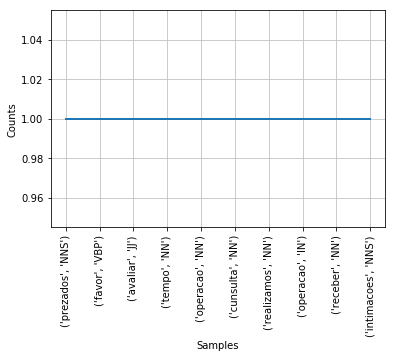

In [115]:
frequencia(s, 10)

In [ ]:
pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(texto)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()